In [ ]:
import pandas as pd
import numpy as np

## Задание 0


Для всех  заданий будем использовать обезличенные транзакционные банковские данные. Для этого считайте в переменные **tr_mcc_codes, tr_types, transactions и gender_train** из одноимённых таблиц из папки [data](https://drive.google.com/drive/folders/1YAMe7MiTxA-RSSd8Ex2p-L0Dspe6Gs4L). 

Для таблицы transactions используйте только первые n=1000000 строк. При чтении файлов обратите внимание на разделители внутри каждого из файлов - они могут различаться!

###  Описание данных
#### Таблица ```transactions.csv```
##### Описание
Таблица содержит историю транзакций клиентов банка за один год и три месяца.

##### Формат данных

```
customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
111111,15 01:40:52,1111,1000,-5224,111111
111112,15 15:18:32,3333,2000,-100,11122233
...
```
##### Описание полей

 - ```customer_id``` — идентификатор клиента;
 - ```tr_datetime``` — день и время совершения транзакции (дни нумеруются с начала данных);
 - ```mcc_code``` — mcc-код транзакции;
 - ```tr_type``` — тип транзакции;
 - ```amount``` — сумма транзакции в условных единицах со знаком; ```+``` — начисление средств клиенту (приходная транзакция), ```-``` — списание средств (расходная транзакция);
 - ```term_id``` — идентификатор терминала;


#### Таблица ```gender_train.csv```

##### Описание
Данная таблица содержит информацию по полу для части клиентов, для которых он известен. Для остальных клиентов пол неизвестен.

##### Формат данных
```
customer_id,gender
111111,0
111112,1
...
```

##### Описание полей
 - ```customer_id``` — идентификатор клиента;
 - ```gender``` — пол клиента;

### Таблица ```tr_mcc_codes.csv```

##### Описание
Данная таблица содержит описание mcc-кодов транзакций.

##### Формат данных
```
mcc_code;mcc_description
1000;словесное описание mcc-кода 1000
2000;словесное описание mcc-кода 2000
...
```

##### Описание полей
 - ```mcc_code``` – mcc-код транзакции;
 - ```mcc_description``` — описание mcc-кода транзакции.

#### Таблица ```tr_types.csv```

##### Описание
Данная таблица содержит описание типов транзакций.

##### Формат данных
```
tr_type;tr_description
1000;словесное описание типа транзакции 1000
2000;словесное описание типа транзакции 2000
...
```

##### Описание полей
 - ```tr_type``` – тип транзакции;
 - ```tr_description``` — описание типа транзакции;

## Датасеты

In [ ]:
transactions = pd.read_csv("https://media.githubusercontent.com/media/daryabaldina1702/Mathematical_methods_of_machine_learning/main/datasets/transactions.csv", sep = ",", nrows = 1000000 )
gender_train = pd.read_csv("https://media.githubusercontent.com/media/daryabaldina1702/Mathematical_methods_of_machine_learning/main/datasets/gender_train.csv", sep = ",")
mcc_codes = pd.read_csv("https://media.githubusercontent.com/media/daryabaldina1702/Mathematical_methods_of_machine_learning/main/datasets/tr_mcc_codes.csv", sep = ";")
tr_types =  pd.read_csv("https://media.githubusercontent.com/media/daryabaldina1702/Mathematical_methods_of_machine_learning/main/datasets/tr_types.csv", sep = ";") 


Задания 1-4 делаются без использования merge!

## Задание 1



1. Для столбца tr_type датафрейма transactions выберите произвольные 1000 строк с помощью метода sample
2. В полученной на предыдущем этапе подвыборке найдите долю транзакций (стобец tr_description в датасете tr_types), в которой содержится подстрока 'POS' или 'ATM'


In [ ]:
#1
tr_type_transaction = pd.DataFrame(transactions.tr_type.sample(n=1000)).reset_index(drop = True)
tr_type_transaction 

,tr_type
0,1010
1,2010
2,1030
3,7030
4,1210
...,...
995,1110
996,1200
997,7071
998,2010


In [ ]:
#2
#выборка из таблицы tr_type, где содержатся подстроки 'POS' или 'ATM'
tr_types_with_substring = tr_types[tr_types.tr_description.str.contains("POS|АТМ")]

#выборка нужных трансзакций из подвыборки пункта 1
necessary_transactions = tr_type_transaction[tr_type_transaction.tr_type.isin(tr_types_with_substring.tr_type)]

#доля 
print("Доля транзакций: ", necessary_transactions.shape[0] / 1000)

Доля транзакций:  0.616


## Задание 2 


1. Для столбца tr_type датафрейма transactions посчитайте частоту встречаемости всех типов транзакций tr_type в transactions.
2. Выведите топ-10 транзакций по частоте встречаемости (вывести для них tr_description тоже).

In [ ]:
#1
types = transactions.groupby(['tr_type'])['amount'].count().reset_index().rename(columns={'amount': 'freq_of_tr_type'})
types

,tr_type,freq_of_tr_type
0,1000,8
1,1010,231117
2,1030,118975
3,1100,15476
4,1110,137658
...,...,...
67,7074,505
68,7075,12
69,8100,2
70,8145,8


In [ ]:
#2
types_top_10  = types.sort_values(by='freq_of_tr_type', ascending=False).head(10).reset_index(drop=True)
descriptions = tr_types[tr_types.tr_type.isin(types_top_10.tr_type)].reset_index(drop=True)
top_10_with_description = types_top_10.copy()
top_10_with_description["tr_description"] = descriptions.tr_description
top_10_with_description = top_10_with_description.sort_values('freq_of_tr_type', ascending = False)
top_10_with_description 

,tr_type,freq_of_tr_type,tr_description
0,1010,231117,Взнос наличных через АТМ (в своем тер.банке)
1,2010,151166,Перевод на карту (с карты) через АТМ (в предел...
2,7070,149006,Перевод на карту (с карты) через Мобильный бан...
3,1110,137658,Перевод на карту (с карты) через Мобильный бан...
4,1030,118975,Покупка. POS ТУ СБ РФ
5,2370,49830,Оплата услуги. Банкоматы СБ РФ
6,7010,28972,Покупка. ТУ Россия
7,7030,26078,Покупка. POS ТУ Россия
8,7071,15781,Выдача наличных в АТМ Сбербанк России
9,1100,15476,Списание с карты на карту по операции <перевод...


## Задание 3
1. В датафрейме transactions найдите клиента с максимальной суммой приходов на карту
2. В датафрейме transactions найдите клиента с максимальной суммой расходов по карте
3. Найдите модуль разницы для этих клиентов между суммой расходов и суммой приходов

In [ ]:
#1
income_amount = transactions[(transactions.amount > 0)] 
client_income = income_amount.groupby('customer_id')['amount'].sum().nlargest(1).reset_index()
client_income

,customer_id,amount
0,70780820,1.248115e+09


In [ ]:
#2
amount_of_expenses = transactions[(transactions.amount < 0)] 
client_expenses = amount_of_expenses.groupby('customer_id')['amount'].sum().nsmallest(1).reset_index()
client_expenses

,customer_id,amount
0,70780820,-1.249952e+09


In [ ]:
#3
#анализирую таблицы выше, мы можем заметить, что это один и тот же человек

print('Разница между суммой расходов и суммой приходов: ', round(abs(client_income.amount.iloc[0] + client_expenses.amount.iloc[0] ),3))

Разница между суммой расходов и суммой приходов:  1837317.98


## Задание 4
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций из топ 10 из задания 2
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций для клиентов из задания 3

In [ ]:
#1 - среднее арифметическое 
tr_of_top10 = transactions[transactions.tr_type.isin(top_10_with_description.tr_type)]
mean_tr_of_top10 = tr_of_top10.groupby('tr_type')['amount'].mean().reset_index().rename(columns={'amount': 'mean'})
mean_tr_of_top10

,tr_type,mean
0,1010,-19784.748640
1,1030,-5320.980222
2,1100,-44061.827262
3,1110,-32119.330371
4,2010,-136077.629325
5,2370,-205418.249032
6,7010,276391.789596
7,7030,86104.332909
8,7070,65569.831700
9,7071,66806.826623


In [ ]:
#1 - медиана
median_tr_of_top10 = tr_of_top10.groupby('tr_type')['amount'].median().reset_index().rename(columns={'amount': 'median'})
median_tr_of_top10

,tr_type,median
0,1010,-7411.52
1,1030,-2245.92
2,1100,-10188.26
3,1110,-11207.57
4,2010,-44918.32
5,2370,-44918.32
6,7010,112295.79
7,7030,13951.52
8,7070,11319.42
9,7071,3593.47


In [ ]:
#2 - среднее арифметическое
tr_of_client = transactions[(transactions.customer_id == 70780820)]
mean_tr_of_client = tr_of_client.groupby('tr_type')['amount'].mean().reset_index().rename(columns={'amount': 'mean'})
mean_tr_of_client

,tr_type,mean
0,2010,-2.941056e+06
1,2330,-2.382398e+06
2,2370,-2.218505e+06
3,6110,1.756293e+04
4,7020,1.465129e+04
5,7021,2.850067e+04
6,7030,1.406196e+04
7,7031,1.921036e+04
8,7034,1.430648e+04
9,7040,2.153833e+04


In [ ]:
#2 - медиана
median_tr_of_client = tr_of_client.groupby('tr_type')['amount'].median().reset_index().rename(columns={'amount': 'median'})
median_tr_of_client

,tr_type,median
0,2010,-3368873.660
1,2330,-2245915.770
2,2370,-2245915.770
3,6110,10028.010
4,7020,10319.985
5,7021,28500.670
6,7030,8848.910
7,7031,12992.620
8,7034,14306.480
9,7040,14396.320


## Подготовка для заданий 5-8

*Из заданий 5-8 нужно выполнить минимум два любых*

Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [ ]:
transactions = pd.merge(transactions, gender_train, how='left')
transactions = pd.merge(transactions, mcc_codes, how='inner')
transactions = pd.merge(transactions, tr_types, how='inner')
transactions.shape

(999584, 9)

## Задание 5

1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount).
2. Определите модуль разницы между средними поступлениями у мужчин и женщин

Обратите внимание, что для вычисления модуля разности точных знаний о том, 
какой класc относится к мужчинам, а какой - к женщинам, не требуется.

In [ ]:
#1
gender_expenses = transactions[(transactions.amount < 0)] 
gender_expenses_mean = gender_expenses.groupby('gender')['amount'].mean().reset_index()
print('Разница между средними тратами мужчин и женщин: ', round(abs(gender_expenses_mean.amount.iloc[0] - gender_expenses_mean.amount.iloc[1]),3))

Разница между средними тратами мужчин и женщин:  32718.055


In [ ]:
#2
gender_income = transactions[(transactions.amount > 0)] 
gender_income_mean = gender_income.groupby('gender')['amount'].mean().reset_index()
print('Разница между средними поступлениями у мужчин и женщин: ', round(abs(gender_income_mean.amount.iloc[0] - gender_income_mean.amount.iloc[1]),3))

Разница между средними поступлениями у мужчин и женщин:  63366.571


## Задание 6

1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 10 типов транзакций для мужчин и для женщин, наименьших среди всех типов транзакций по полученным значениям "max_income". 
2. Выделите среди них те типы транзакций, которые встречаются одновременно и у мужчин, и у женщин

In [ ]:
#1
max_sum = gender_income.groupby(['gender', 'tr_type'])['amount'].max().reset_index().rename(columns={'amount': 'max_income'})
tr_sum_men = max_sum[(max_sum.gender == 1)].sort_values(by = 'max_income').head(10)
tr_sum_women = max_sum[(max_sum.gender == 0)].sort_values(by = 'max_income').head(10)
tr_sum = tr_sum_men.append(tr_sum_women)
tr_sum #сначала 10 мужских наименьших сумм транзакций, затем 10 женских наименьших сумм транзакций

,gender,tr_type,max_income
47,1.0,4110,2245.92
44,1.0,2020,2245.92
38,1.0,1010,28803.87
71,1.0,8100,64682.37
48,1.0,6000,79280.83
66,1.0,7041,87590.72
43,1.0,2010,89836.63
45,1.0,2110,112295.79
46,1.0,2370,113194.15
57,1.0,7015,121279.45


In [ ]:
#2
comm_types = pd.DataFrame({'num_of_repeat': tr_sum.tr_type.value_counts()}).reset_index().rename(columns={'index': 'tr_type_comm'})
comm_types = comm_types[(comm_types.num_of_repeat == 2)]
comm_types.iloc[:, :1]

,tr_type_comm
0,4110
1,1010
2,2010
3,2110
4,2370


## Задание 7

1. Найдите суммы затрат по каждой категории (mcc) для мужчин и для женщин. 
2. Найдите топ 10 категорий с самыми большими относительными модулями разности в тратах для разных полов (в ответе должны присутствовать описания mcc кодов).

In [ ]:
#1
mcc = gender_expenses.groupby(['mcc_code', 'gender'])['amount'].sum().reset_index()
mcc_men = mcc[(mcc.gender == 1 )]
mcc_women = mcc[(mcc.gender == 0 )] 

In [ ]:
#2
all_mcc = mcc_men.merge(mcc_women, on = 'mcc_code')
all_mcc['difference'] = abs(all_mcc.amount_x - all_mcc.amount_y)
top_mcc = all_mcc.drop(columns = ['gender_x', 'gender_y', 'amount_x', 'amount_y' ], axis = 1).sort_values(by = 'difference', ascending = False).head(10)
top_mcc = top_mcc.merge(mcc_codes, on = 'mcc_code')
top_mcc

,mcc_code,difference,mcc_description
0,6011,3.085862e+09,Финансовые институты — снятие наличности автом...
1,4829,2.499153e+09,Денежные переводы
2,6010,2.208580e+08,Финансовые институты — снятие наличности вручную
3,5541,1.554326e+08,Станции техобслуживания
4,5511,7.352877e+07,"Легковой и грузовой транспорт — продажа, серви..."
5,5812,7.037856e+07,"Места общественного питания, рестораны"
6,5977,4.241762e+07,Магазины косметики
7,5533,4.233808e+07,Автозапчасти и аксессуары
8,7995,4.079564e+07,Транзакции по азартным играм
9,5661,3.815470e+07,Обувные магазины


## Задание 8

1. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
2. Посчитайте количество транзакций с amount<0 в ночное время для мужчин и женщин. Ночное время - это примерно 00-06 часов. 

In [ ]:
#1
tr = transactions.copy()
tr['tr_hour'] = tr.apply(lambda r: int(r.tr_datetime[r.tr_datetime.find(" "):r.tr_datetime.find(":")]), axis=1)
tr 

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,tr_hour
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,10
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,7
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,7
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,8
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,14
...,...,...,...,...,...,...,...,...,...,...
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,23
999580,6808459,206 19:00:10,3000,6000,124693.24,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,19
999581,83759123,90 22:40:57,3000,6000,218976.79,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,22
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,23


In [ ]:
tr_night = tr[(tr.amount < 0) & (tr.tr_hour >= 0) & (tr.tr_hour <= 6)]
num_of_night_tr = tr_night.groupby('gender')['gender'].count()
num_of_night_tr

gender
0.0    43510
1.0    46694
Name: gender, dtype: int64

# Дополнительное задание


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
tr = tr[['tr_type', 'tr_hour']]
type_time = tr[tr.tr_type.isin(comm_types.tr_type_comm)].reset_index(drop=True)
type_time_count = pd.DataFrame(type_time.groupby(['tr_hour', 'tr_type'])['tr_type'].count()).rename(columns={'tr_type': 'tr_count'}).reset_index()
type_time_count

,tr_hour,tr_type,tr_count
0,0,1010,578
1,0,2010,400
2,0,2110,940
3,0,2370,514
4,0,4110,938
...,...,...,...
111,23,1010,884
112,23,2010,555
113,23,2110,3
114,23,2370,963


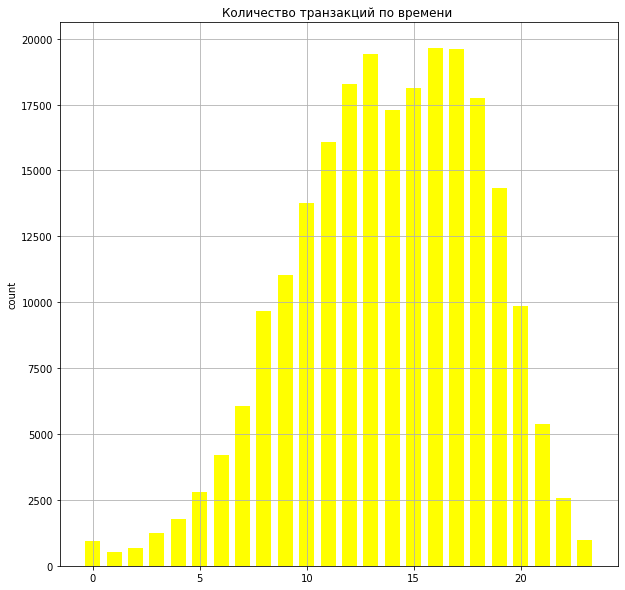

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.bar(x=type_time_count.tr_hour, height=type_time_count.tr_count, width=.7, color = 'yellow')
plt.ylabel("count")
plt.title('Количество транзакций по времени ')
ax.grid()